## 80 collision hotspot locations: OSMnx'highway types classifications'

This notebook outputs OSMnx highway type stats for the 80 collision hotspots we've identified in LA. Huge thanks to Yoh for all of his help with this notebook.

*Notebook Author:* Ellie

In [162]:
import pandas as pd

In [163]:
#import csv to dataframe
df = pd.read_csv('Data/locations.csv')

In [164]:
df

,point_x,point_y,match_addr
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA"
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA"
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA"
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA"
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA"
...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA"
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA"
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA"
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA"


In [165]:
# add columns to df for metrics to capture later on
df['primary']=0
df['service']=0
df['residential']=0
df['pedestrian']=0
df['secondary']=0
df['tertiary']=0
df['steps']=0
df['path']=0
df['footway']=0
df['trunk']=0

In [166]:
df

,point_x,point_y,match_addr,primary,service,residential,pedestrian,secondary,tertiary,steps,path,footway,trunk
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0


In [167]:
# rename columns
df.columns = ['Longitude',
              'Latitude',
              'Location',
              'primary',
              'service',
              'residential',
              'pedestrian',
              'secondary',
              'tertiary',
              'steps',
              'path',
              'footway',
              'trunk']
df

,Longitude,Latitude,Location,primary,service,residential,pedestrian,secondary,tertiary,steps,path,footway,trunk
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0


In [168]:
import geopandas as gpd
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf

,Longitude,Latitude,Location,primary,service,residential,pedestrian,secondary,tertiary,steps,path,footway,trunk,geometry
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0,POINT (-118.27032 34.06666)
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0,POINT (-118.26521 33.92548)
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0,POINT (-118.33348 34.07616)
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0,POINT (-118.25608 34.01604)
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0,POINT (-118.25652 33.95390)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0,POINT (-118.30902 33.96726)
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0,POINT (-118.30902 33.96621)
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0,POINT (-118.36251 34.06303)
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",0,0,0,0,0,0,0,0,0,0,POINT (-118.57142 34.17699)


## Creating a function that will loop through our 80 locations

In [169]:
# for plotting
import matplotlib.pyplot as plt

# for spatial
import geopandas as gpd

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

In [170]:
# create a function 
def analyze_highway_type(lat,lon):
    # call osmnx with a lat/lon pair
    G = ox.graph.graph_from_point((lat,lon),dist=100)
    
    #project to webmercator 
    G = ox.project_graph(G, to_crs='epsg:3857')
    
    # convert nodes and edges to geodataframes
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
    
    # value counts for edges 'highway'
    highway = gdf_edges['highway'].value_counts()
   
    # return observations as a dictionary
    d = dict()
    d['primary']=len(gdf_edges[gdf_edges['highway'] == 'primary'])
    d['residential']=len(gdf_edges[gdf_edges['highway'] == 'residential'])
    d['service']=len(gdf_edges[gdf_edges['highway'] == 'service'])
    d['pedestrian']=len(gdf_edges[gdf_edges['highway'] == 'pedestrian'])
    d['secondary']=len(gdf_edges[gdf_edges['highway'] == 'secondary'])
    d['tertiary']=len(gdf_edges[gdf_edges['highway'] == 'tertiary'])
    d['steps']=len(gdf_edges[gdf_edges['highway'] == 'steps'])
    d['path']=len(gdf_edges[gdf_edges['highway'] == 'path'])
    d['footway']=len(gdf_edges[gdf_edges['highway'] == 'footway'])
    d['trunk']=len(gdf_edges[gdf_edges['highway'] == 'trunk'])
    return d
analyze_highway_type(34.066662, -118.270324)

{'primary': 10,
 'residential': 2,
 'service': 2,
 'pedestrian': 0,
 'secondary': 0,
 'tertiary': 0,
 'steps': 0,
 'path': 0,
 'footway': 0,
 'trunk': 0}

In [171]:
# testing the function with another random lat/lon pair
analyze_highway_type(33.966213, -118.309024)

{'primary': 4,
 'residential': 6,
 'service': 4,
 'pedestrian': 0,
 'secondary': 0,
 'tertiary': 0,
 'steps': 0,
 'path': 0,
 'footway': 0,
 'trunk': 0}

In [172]:
# loop through the dataframe and analyze
for index, row in gdf.iterrows():
    # call the function
    new_data = analyze_highway_type(row.Latitude,row.Longitude)
    
    # add data to the column you created
    gdf.loc[index, 'primary'] = new_data['primary']
    gdf.loc[index, 'residential'] = new_data['residential']
    gdf.loc[index, 'service'] = new_data['service']
    gdf.loc[index, 'pedestrian'] = new_data['pedestrian']
    gdf.loc[index, 'secondary'] = new_data['secondary']
    gdf.loc[index, 'tertiary'] = new_data['tertiary']
    gdf.loc[index, 'steps'] = new_data['steps']
    gdf.loc[index, 'footway'] = new_data['footway']
    gdf.loc[index, 'trunk'] = new_data['trunk']
    gdf.loc[index, 'path'] = new_data['path']

In [173]:
# see new data added to gdf columns
gdf

,Longitude,Latitude,Location,primary,service,residential,pedestrian,secondary,tertiary,steps,path,footway,trunk,geometry
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",10,2,2,0,0,0,0,0,0,0,POINT (-118.27032 34.06666)
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",0,0,4,0,2,0,0,0,0,0,POINT (-118.26521 33.92548)
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",2,0,0,0,0,0,0,4,0,0,POINT (-118.33348 34.07616)
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",4,6,8,0,0,0,0,0,0,0,POINT (-118.25608 34.01604)
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",6,10,8,0,0,2,0,0,0,0,POINT (-118.25652 33.95390)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",4,6,4,0,0,6,0,0,0,0,POINT (-118.30902 33.96726)
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",4,4,6,0,0,0,0,0,0,0,POINT (-118.30902 33.96621)
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",14,11,0,0,4,0,0,0,6,0,POINT (-118.36251 34.06303)
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",0,4,0,0,2,0,0,0,0,0,POINT (-118.57142 34.17699)


In [179]:
# column totals
gdf.sum(numeric_only=True)

Longitude     -9706.003811
Latitude       2794.715834
primary         454.000000
service        1150.000000
residential     337.000000
pedestrian        2.000000
secondary       304.000000
tertiary         77.000000
steps             8.000000
path             12.000000
footway         474.000000
trunk             5.000000
dtype: float64

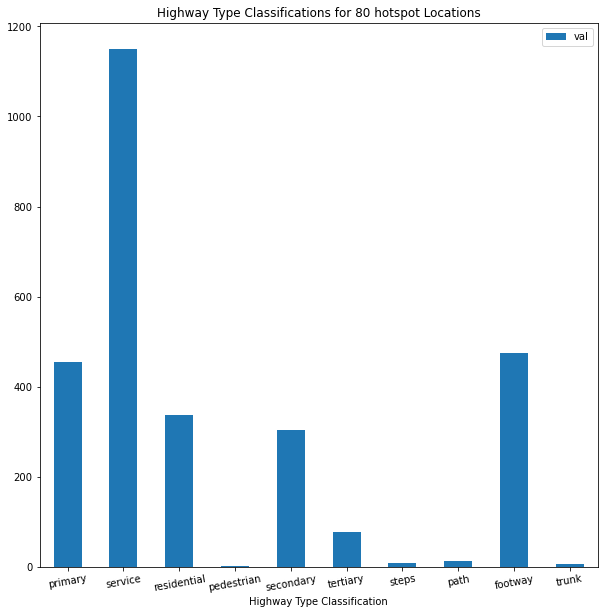

In [153]:
# plotting a bar chart

plotdata = pd.DataFrame({'Highway Type Classification':['primary', 'service', 'residential', 'pedestrian', 'secondary', 'tertiary', 'steps', 'path', 'footway', 'trunk'], 'val':[(454), (1150), (337), (2), (304), (77), (8), (12), (474), (5)]})
ax = gdf.plot.bar(
    figsize=(10, 10),
    x='Highway Type Classification', y='val', title='Highway Type Classifications for 80 hotspot Locations', rot=10,)